In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
crdata=pd.read_csv("cs-training.csv")
crdata_2=pd.read_csv("cs-training.csv")

In [3]:
crdata.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
crdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
crdata.shape

(150000, 12)

In [6]:

crdata.columns
#columns of the credit dataset

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [7]:
#the unnamed column is sequence number. It is not relevant for the model devleopment
#therefore, the 'unnamed ' shall be dropped
crdata = crdata.loc[:, ~crdata.columns.str.contains('^Unnamed')]

In [8]:
crdata.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Exploratory Data Analysis (EDA) 

In [9]:
#describe the credit data
crdata.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## checking for missing values

In [10]:
crdata.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [11]:
# The MonthlyIncome has 29,731 missing values, whereas the  NumberOfDependents hase 3924 missing values.

## Missing value handling  

In [12]:
#MonthlyIncome and NumberOfDependents are numerical values. Therefore the Mean imputation is appropraite. 
# The fillna from  will be used to fill the missing values. The missing values will be replaced by
# the mean of the columns having missing values
crdat_before=crdata
crdata.fillna(value=crdata.mean(),inplace=True)

In [13]:
crdata.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [14]:
#A Person who experienced 90 days past due delinquency or worse is high likely to have bad credit score. 
#According to the data dictionary given in this challenge, 'SeriousDlqin2yrs' is our target class. 
#The rest are features (attributes)

## Checking for class imbalance

In [15]:
print(pd.Series('SeriousDlqin2yrs').value_counts())

SeriousDlqin2yrs    1
Name: count, dtype: int64


# Class Balancing Using Oversampling 

## correlation matrix

<Axes: >

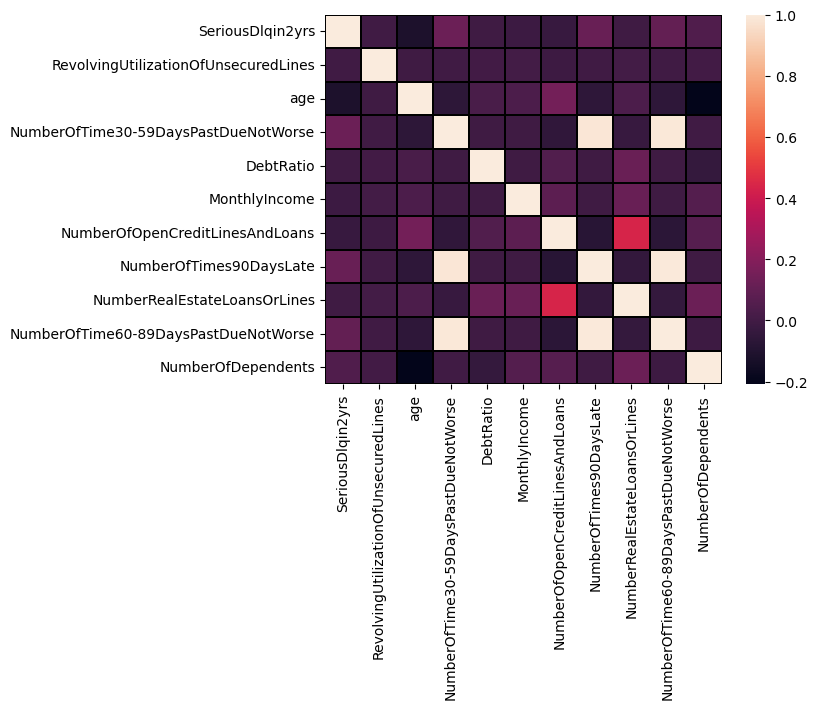

In [172]:
sns.heatmap(crdata.corr(), linecolor='black', linewidths=1.2)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


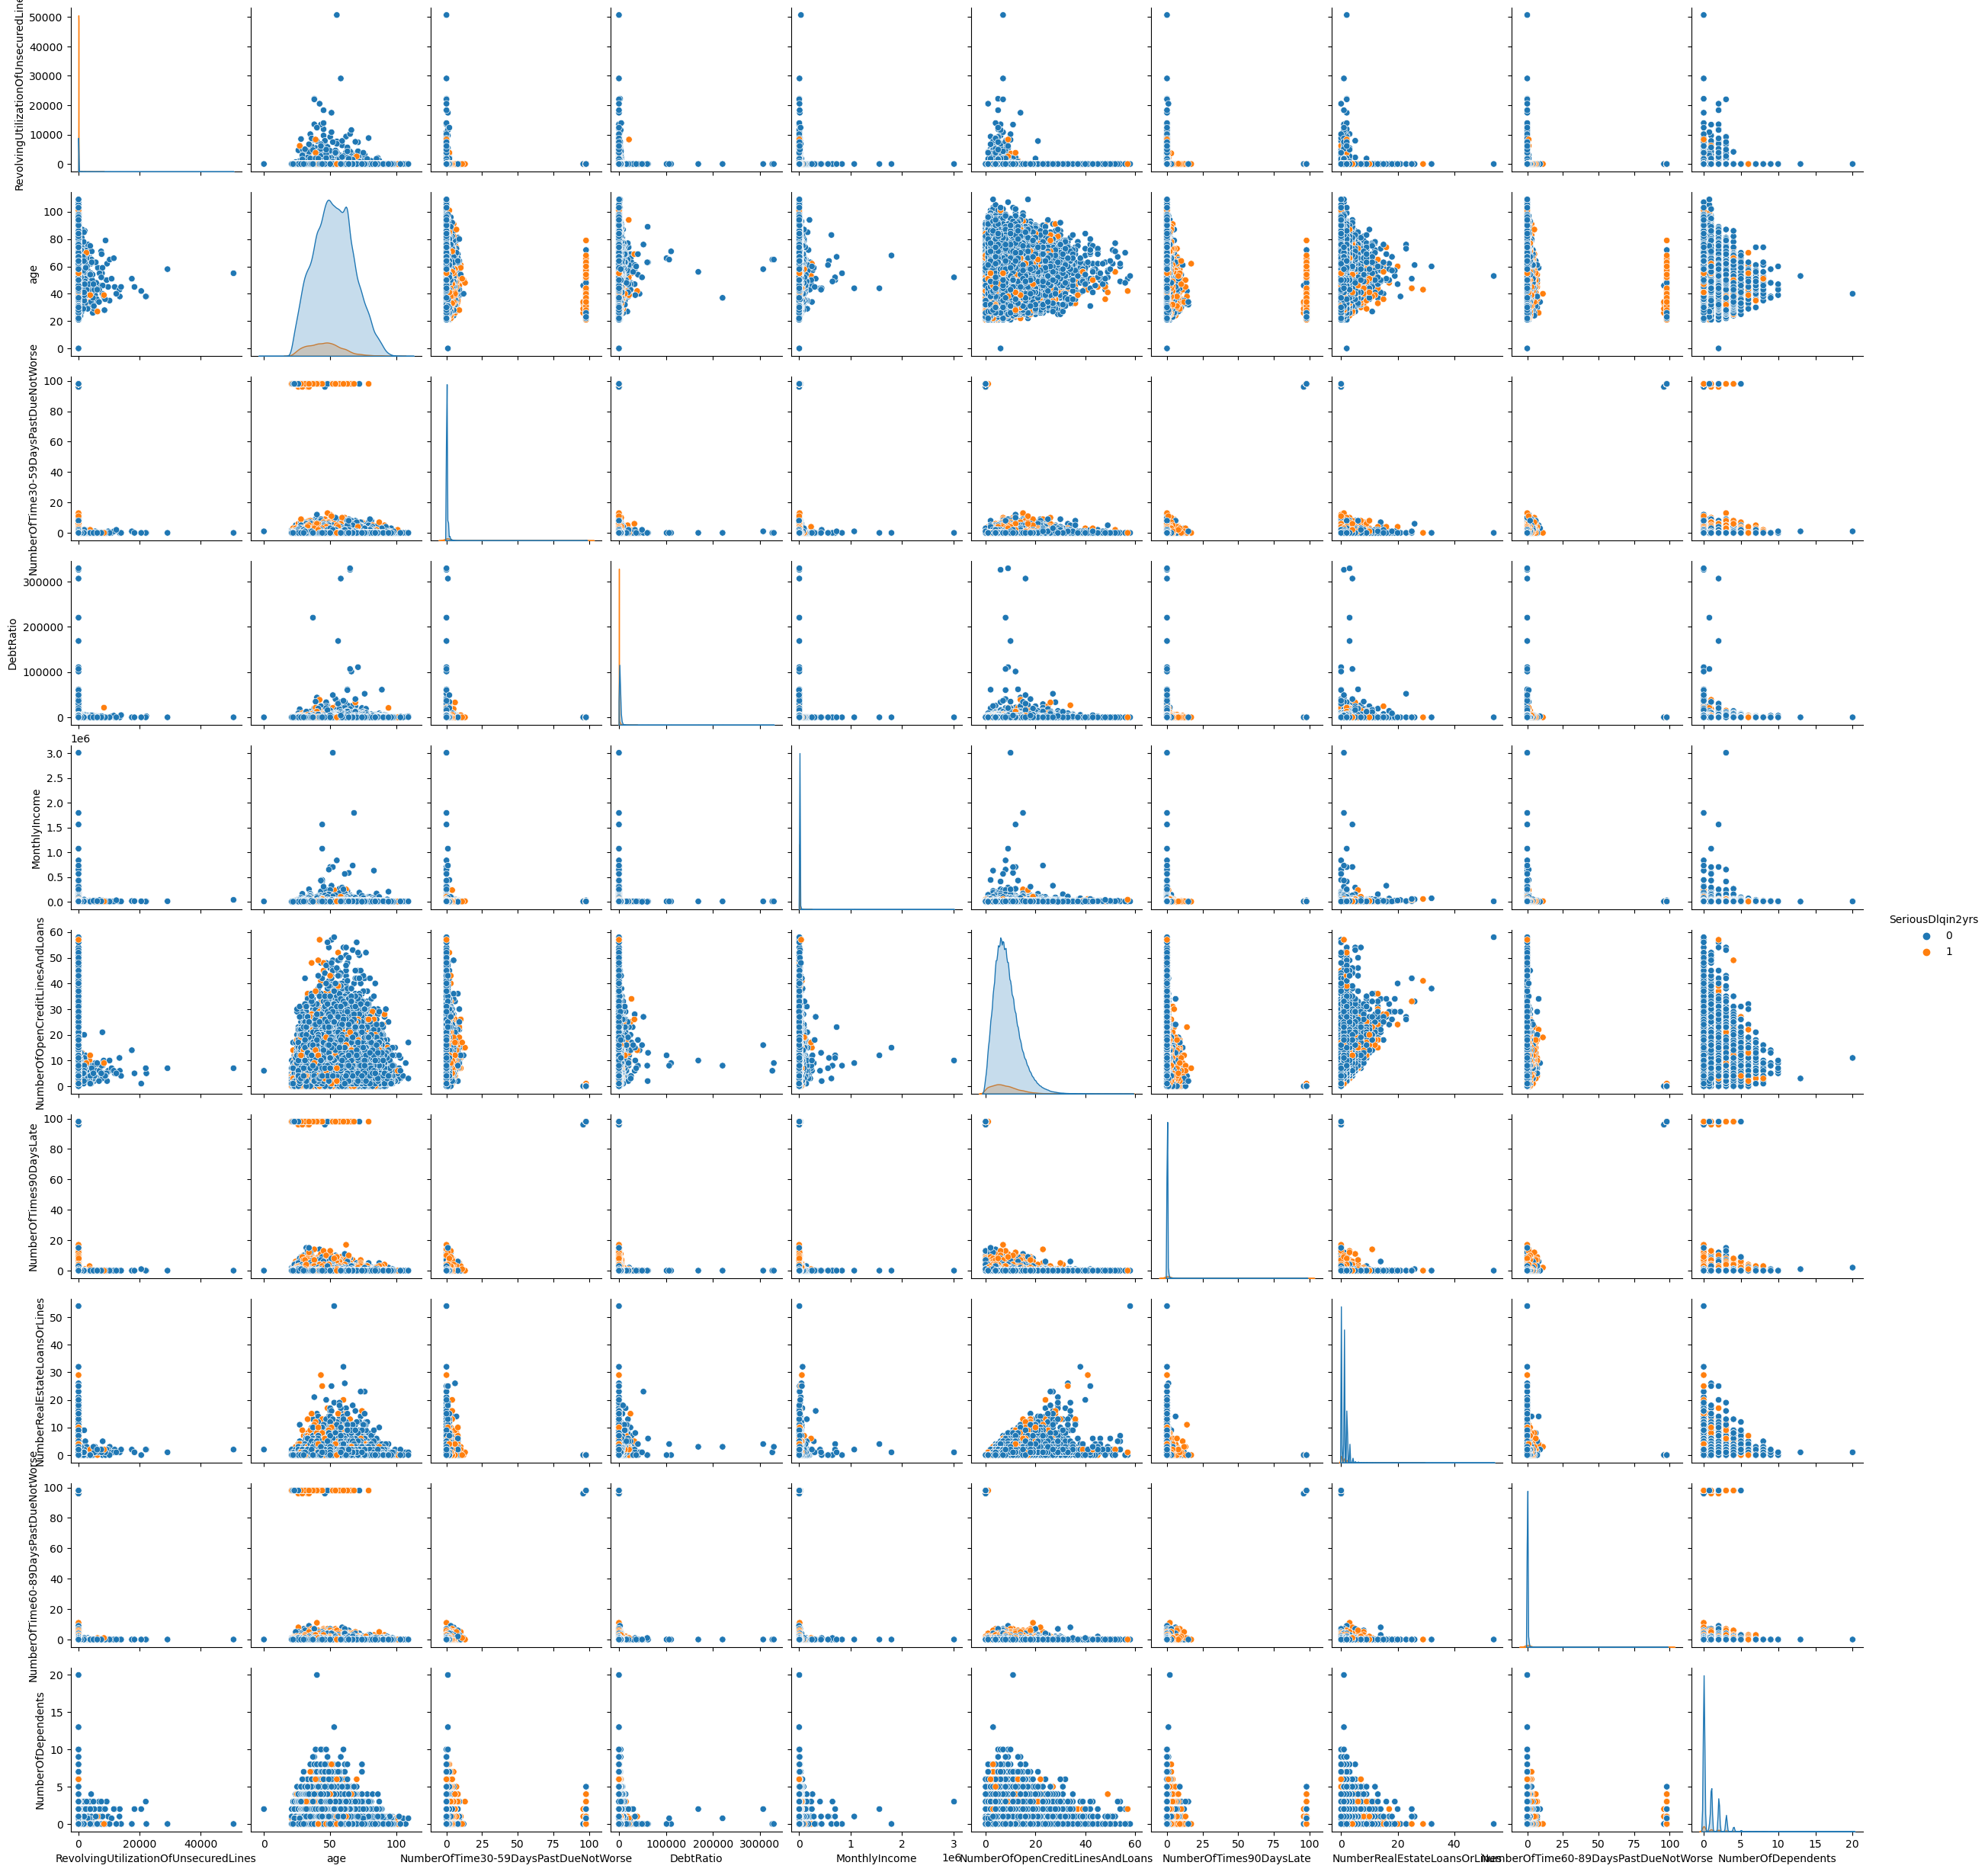

In [126]:
sns.pairplot(crdata, hue='SeriousDlqin2yrs')

In [16]:
crdata.columns


Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [17]:
crdata.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.100404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


(array([1.49127e+05, 5.40000e+02, 5.30000e+01, 1.00000e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.69000e+02]),
 array([ 0.  ,  3.92,  7.84, 11.76, 15.68, 19.6 , 23.52, 27.44, 31.36,
        35.28, 39.2 , 43.12, 47.04, 50.96, 54.88, 58.8 , 62.72, 66.64,
        70.56, 74.48, 78.4 , 82.32, 86.24, 90.16, 94.08, 98.  ]),
 <BarContainer object of 25 artists>)

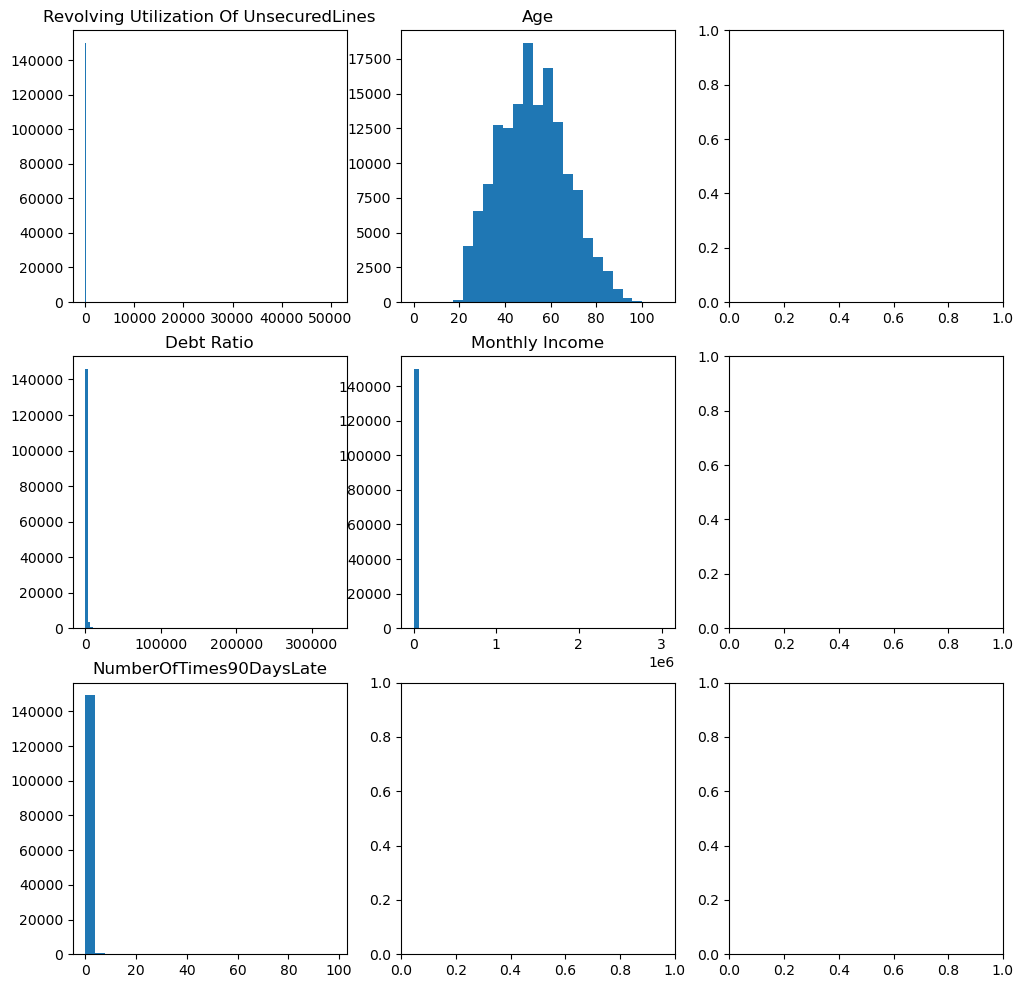

In [129]:
fig, axes = plt.subplots(3, 3, figsize=(12,12)) 
  
axes[0,0].set_title("Revolving Utilization Of UnsecuredLines") 
axes[0,0].hist(crdata['RevolvingUtilizationOfUnsecuredLines'], bins=1500) 
  
axes[0,1].set_title("Age") 
axes[0,1].hist(crdata['age'], bins=25); 
  
axes[1,0].set_title("Debt Ratio") 
axes[1,0].hist(crdata['DebtRatio'], bins=100); 
  
axes[1,1].set_title("Monthly Income") 
axes[1,1].hist(crdata['MonthlyIncome'], bins=50)

axes[2,0].set_title("NumberOfTimes90DaysLate") 
axes[2,0].hist(crdata['NumberOfTimes90DaysLate'], bins=25)


#axes[2,1].set_title("Credit score") 
#axes[2,1].hist(crdata['SeriousDlqin2yrs'], bins=100) 

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
#from sklearn.model_selection import train_test_split


In [19]:
X_train =crdata[['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']]
y_train=crdata['SeriousDlqin2yrs']

In [20]:
crdata['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

In [21]:
# The above result indicates that there is class imbalance between bad and normal credit scores 
print('The bad credit score is', 139974/10026, 'fold greater than the good credit score')

The bad credit score is 13.961101137043686 fold greater than the good credit score


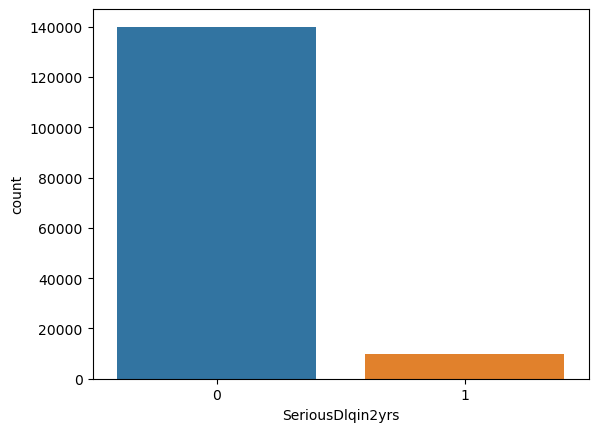

In [179]:
import seaborn as sns 
import matplotlib.pyplot as plt   
  
sns.countplot(x='SeriousDlqin2yrs', data=crdata, ) 
plt.show()

In [22]:
crdata.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [187]:
y_train.head()

0    1
1    0
2    0
3    0
4    0
Name: SeriousDlqin2yrs, dtype: int64

In [44]:
#The class is imbalanced, therefore, we shall balance it using the SMOTE oversampling technique
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
#X_train_balanced = smote.fit_resample(X_train)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
#X1_train_balanced, y1_train_balanced = smote.fit_resample(x1_train, y1_train)
#X2_train_balanced, y2_train_balanced = smote.fit_resample(x2_train, y2_train)

# Apply SMOTE to oversample the minority class
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [45]:
# the classes after balancing 
y_train_balanced.value_counts()

SeriousDlqin2yrs
1    139974
0    139974
Name: count, dtype: int64

In [84]:
scaler = StandardScaler()
X_train_standardzd = scaler.fit_transform(X_train_balanced)
#y_train_standardzd = scaler.fit_transform(y_train_balanced)

In [86]:
crdata_preproceesed=pd.concat([X_train_balanced,y_train_balanced])

In [87]:
crdata_preproceesed.to_csv('Credit_data_prepocessed.csv', index=False)


In [67]:
X_test_cr=pd.read_csv('cs-test.csv')

In [68]:
X_test_cr.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [69]:
X_test_cr.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [72]:
X_credit_test=X_test_cr[['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']]
y_credit_test=X_test_cr['SeriousDlqin2yrs']

In [73]:
y_credit_test

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
101498   NaN
101499   NaN
101500   NaN
101501   NaN
101502   NaN
Name: SeriousDlqin2yrs, Length: 101503, dtype: float64

In [74]:
X_credit_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


## Handling Missing Values for the testing data

In [75]:

mean_NumberOfDependents_value = X_credit_test['NumberOfDependents'].mean()
X_credit_test.loc[X_credit_test['NumberOfDependents'].isna(), 'NumberOfDependents'] = mean_NumberOfDependents_value


In [76]:
mean_MonthlyIncome_value = X_credit_test['MonthlyIncome'].mean()
X_credit_test.loc[X_credit_test['MonthlyIncome'].isna(), 'MonthlyIncome'] = mean_MonthlyIncome_value

In [77]:
X_credit_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## normalization (StandardScaler)

In [78]:
scaler = StandardScaler()
X_test_standardzd = scaler.fit_transform(X_credit_test)

## Credit score model using NB

In [100]:
# The training data is splitted into three partitions to develope and validate the model.
#X_train, X_val, y_train, y_val = train_test_split(X_train_standardzd, y_train_balanced, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train_standardzd, y_train_balanced, test_size=0.2, random_state=42)

In [162]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [163]:
#Guassian Naive bayes model is used becasue the feature values are continous
model = GaussianNB() 
# Train the model on the training data
model.fit(X_train, y_train)

GaussianNB()

In [166]:
#Guassian Naive bayes model is used becasue the feature values are continous
# for the cd-test.csv
model_cd = GaussianNB() 

In [172]:
#Training the model using the cd-train.csv 
model_cd.fit(X_train_standardzd, y_train_balanced)

GaussianNB()

In [168]:
# Make predictions on the testing data
y_pred = model.predict(X_test)


In [169]:
# Make predictions on the cd-test.csv
y_pred_cd = model_cd.predict(X_test_standardzd)


In [170]:
# make prediction probabilities using the cd-test.csv file
y_pred_probalities_cd = model_cd.predict_proba(X_test_standardzd)[:, 1] 

In [171]:
y_pred_probalities_cd

array([0.30024599, 0.08654573, 0.14495641, ..., 0.11278733, 0.01513789,
       0.24590671])

In [117]:
# Evaluate model performance of the Naive Bayes model (accuracy and AUCROC)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

roc_auc=roc_auc_score(y_test, y_pred)
print("AUCROC:", roc_auc)

# roc_auc_cd=roc_auc_score(y_test, y_pred_cd)
# print("AUCROC for the cd-test.csv is:", roc_auc_cd)

Accuracy: 0.5073763171994999
AUCROC: 0.5086007367791965


## Credit score model using LR

In [118]:
model_lr = LogisticRegression()

In [120]:
model_lr.fit(X_train, y_train)

LogisticRegression()

In [121]:
y_pred_lr = model_lr.predict(X_test)

In [122]:
#Evalute the logistic regression model
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

roc_auc=roc_auc_score(y_test, y_pred_lr)
print("AUCROC:", roc_auc)

Accuracy: 0.6598678335417039
AUCROC: 0.6599032205739298


In [124]:
from xgboost import XGBClassifier

In [133]:
#  model_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0,
#               learning_rate=0.1, max_delta_step=0, max_depth=7,
#               min_child_weight=1, missing=None, n_estimators=7, n_jobs=-1,
#               nthread=None, objective='binary:logistic', random_state=0,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#               silent=None, subsample=1, verbosity=2)
# model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=7,
              max_leaves=None, min_child_weight=1, missing=None,
              monotone_constraints=None, multi_strategy=None, n_estimators=7,
              n_jobs=-1, nthread=None, num_parallel_tree=None, ...)

In [140]:
model_xgb=XGBClassifier()

In [141]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [153]:
y_pred_xgb = model_xgb.predict(X_test)
y_pred_xgb_b = model_xgb.predict(X_test_standardzd)

In [154]:
y_pred_probalities = model_xgb.predict_proba(X_test)[:, 1]  

In [159]:
y_pred_probalities
#print(len(y_pred_probalities))

array([0.00176345, 0.39882025, 0.0644104 , ..., 0.4703421 , 0.99928844,
       0.9988759 ], dtype=float32)

In [160]:
cd_test_probalities = model_xgb.predict_proba(X_test_standardzd)[:, 1] 
#print(len(cd_test_probalities))

In [161]:
cd_test_probalities

array([0.97410357, 0.6453317 , 0.56525207, ..., 0.9616711 , 0.98685   ,
       0.96647036], dtype=float32)

In [150]:
y_pred_xgb_b
#y_pred_xgb_b.to_csv('c-test-predicted-xgb.csv', index = false)
# save(y_pred_xgb_b,'c-test-predicted-xgb.csv')
len(y_pred_xgb_b)


[1 1 1 ... 1 1 1]


In [151]:
#Evalute the the XGB model
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of XGB:", accuracy)

# accuracy_b = accuracy_score(y_credit_test, y_pred_xgb_b)
# print("Accuracy of XGB using the given test data is :", accuracy_b)

roc_auc=roc_auc_score(y_test, y_pred_xgb)
print("AUCROC for XGB:", roc_auc)

# roc_auc_b = roc_auc_score(y_credit_test, y_pred_xgb_b)
# print("AUCROC of XGB using the given test data is :", roc_auc_b)

Accuracy of XGB: 0.8819610644757993
AUCROC for XGB: 0.8820264665684486


In [229]:
#XGBoost modle is used to predict the probabilities for entries of the test data set, cd-tes.csv

model_cd_xgb = XGBClassifier()

#Training the model using the cd-train.csv 
model_cd_xgb.fit(X_train_standardzd, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [230]:
# Make predictions on the cd-test.csv
y_pred_cd_xgb = model_cd_xgb.predict(X_test_standardzd)


In [ ]:
# #AUCROC result for the cd-test.csv data
# roc_auc_cd=roc_auc_score(y_test, y_pred_cd_xgb)
# print("AUCROC for XGB:", roc_auc)

In [231]:
#prediction probabilities for the cd-test.csv data
y_predition_probalities_xgb = model_cd_xgb.predict_proba(X_test_standardzd)[:, 1] 

In [232]:
y_predition_probalities_xgb

array([0.9957625 , 0.79172534, 0.7449855 , ..., 0.7108164 , 0.9810105 ,
       0.9718787 ], dtype=float32)

In [233]:
Probabilities=pd.DataFrame(y_predition_probalities_xgb)

In [234]:
Probabilities.head()

,0
0,0.995763
1,0.791725
2,0.744986
3,0.929307
4,0.977077


In [235]:
Probabilities.shape

(101503, 1)

In [236]:
Probabilities

,0
0,0.995763
1,0.791725
2,0.744986
3,0.929307
4,0.977077
...,...
101498,0.920626
101499,0.982769
101500,0.710816
101501,0.981010


In [237]:
Id = range(101503)
Id = pd.DataFrame(Id, columns=["Id"])
# Prob_col =pd.DataFrame(prob_entries, columns=["probabilites"])

In [238]:
# result_entry=pd.DataFrame(columns =["Id", "prob_entries"])
result_entry=pd.concat([Id, Probabilities], axis=1)


In [240]:
result_entry.columns= ['Id','Probabilities']

In [241]:
result_entry.shape

(101503, 2)

In [242]:
result_entry.head()

,Id,Probabilities
0,0,0.995763
1,1,0.791725
2,2,0.744986
3,3,0.929307
4,4,0.977077


In [246]:
#Save the predicted probabilites to .csv file
result_entry.to_csv('Prediction_Prob_entery_abd.csv', index=False)
result_entry.to_excel('Prediction_Prob_entery_abd.xlsx', sheet_name='Predicted_prob_entries')